# ADA Assignment 3: Röstigraben at FNS?
The purpose of this assignement is to see if grants from the FNS change between cantons.

First, let import dependencies.

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Look at the data

In [27]:
data = pd.read_csv('data/P3_GrantExport.csv', delimiter=';', index_col=0, parse_dates=["Start Date", "End Date"])
data.head()

,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,Start Date,End Date,Approved Amount,Keywords
"﻿""Project Number""",,,,,,,,,,,,,,
1,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,Nicht zuteilbar - NA,10302,Swiss history,Human and Social Sciences;Theology & religious...,1975-01-10,1976-09-30,11619.00,NaN
4,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Université de Genève - GE,10104,Educational science and Pedagogy,"Human and Social Sciences;Psychology, educatio...",1975-01-10,1976-09-30,41022.00,NaN
5,"Kritische Erstausgabe der ""Evidentiae contra D...",NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,"NPO (Biblioth., Museen, Verwalt.) - NPO",10101,Philosophy,Human and Social Sciences;Linguistics and lite...,1976-01-03,1985-02-28,79732.00,NaN
6,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Universität Basel - BS,10302,Swiss history,Human and Social Sciences;Theology & religious...,1975-01-10,1976-09-30,52627.00,NaN
7,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,"NPO (Biblioth., Museen, Verwalt.) - NPO",10303,Ancient history and Classical studies,Human and Social Sciences;Theology & religious...,1976-01-01,1978-04-30,120042.00,NaN


Parse dates

In [28]:
data['Start Date']=pd.to_datetime(data['Start Date'])
data['Start Date']

﻿"Project Number"
1        1975-01-10
4        1975-01-10
5        1976-01-03
6        1975-01-10
7        1976-01-01
8        1976-01-01
9        1976-01-01
10       1975-01-10
11       1975-01-10
13       1975-01-10
14       1975-01-10
17       1975-01-10
18       1975-01-10
19       1975-01-10
20       1975-01-10
21       1975-01-10
23       1975-01-10
25       1976-01-01
26       1976-01-01
27       1975-01-12
28       1975-01-10
30       1975-01-10
32       1976-01-01
33       1975-01-10
34       1976-01-01
35       1975-01-10
36       1975-01-10
37       1975-01-10
38       1975-01-10
39       1975-01-10
            ...    
170414   2016-01-08
170473   2016-01-07
170478   2016-01-08
170510   2016-01-07
170707   2016-01-08
170714   2016-01-07
170715   2016-01-08
170716   2016-01-09
170718   2016-01-08
170762   2016-01-09
170806   2016-01-09
170812   2016-01-10
170813   2016-01-10
170814   2016-01-10
170815   2016-01-09
170817   2016-01-09
170883   2016-01-10
170893   2016-01-08
17

In [29]:
data.dtypes

Project Title                           object
Project Title English                   object
Responsible Applicant                   object
Funding Instrument                      object
Funding Instrument Hierarchy            object
Institution                             object
University                              object
Discipline Number                        int64
Discipline Name                         object
Discipline Name Hierarchy               object
Start Date                      datetime64[ns]
End Date                        datetime64[ns]
Approved Amount                         object
Keywords                                object
dtype: object

### Cleaning Approved Amount field
One strange issue is that the _Approved Amount_ field is not if numeric type. In order to know the amount by canton, we'll need to deal with numeric field. Let see what happen with this field.

In [30]:
amounts = data['Approved Amount']
lengths = amounts.apply(len)
lengths.sort_values(ascending=False)

﻿"Project Number"
115371    23
68589     23
68587     23
143349    23
143347    23
143346    23
143344    23
143341    23
68565     23
121410    23
143334    23
121413    23
121414    23
121415    23
143329    23
121419    23
121420    23
68554     23
121423    23
68553     23
121425    23
121426    23
121428    23
143310    23
143304    23
68588     23
143357    23
68844     23
121376    23
68842     23
          ..
136174     4
108139     4
119340     4
25134      4
154931     4
130351     4
122211     4
116684     4
158008     4
124365     4
128818     4
6969       4
121658     4
110687     4
53377      4
67372      4
142963     4
58444      4
3507       4
59240      4
122833     4
141982     4
158075     4
145291     4
111516     4
122086     4
26963      4
131653     4
116015     4
120978     4
Name: Approved Amount, dtype: int64

In [31]:
amounts[lengths == 23]

﻿"Project Number"
20001     data not included in P3
20002     data not included in P3
20003     data not included in P3
20004     data not included in P3
20005     data not included in P3
20006     data not included in P3
20007     data not included in P3
20008     data not included in P3
20009     data not included in P3
20010     data not included in P3
20011     data not included in P3
20012     data not included in P3
20013     data not included in P3
20014     data not included in P3
20015     data not included in P3
20016     data not included in P3
20017     data not included in P3
20018     data not included in P3
20019     data not included in P3
20020     data not included in P3
20021     data not included in P3
20022     data not included in P3
20023     data not included in P3
20024     data not included in P3
20025     data not included in P3
20026     data not included in P3
20027     data not included in P3
20028     data not included in P3
20029     data not included in

It looks like the issue is the _null_ value for the field. 

Before trying to solve it, FNS specified that too old data might be incoherent. Thus, for the sake of this analysis, considering only the recent years is the enough.

Thus, let obtain the last date where _data not included in P3_ arise.

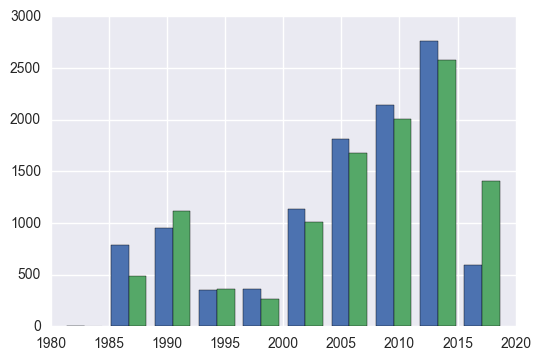

In [49]:
bound_years = data[lengths == 23][["Start Date", "End Date"]].apply(lambda x: x.apply(lambda y: y.year))
_=plt.hist(x=[bound_years['Start Date'], bound_years['End Date']])

As we can see, entries where the amount of the grants isn't known are quite frequent and well distributed over the time. Therefore, the claim that it arise during the early years is wrong (completely wrong).

Thus, the amount field is cleaned with NaN.

In [53]:
data['Approved Amount'] = pd.to_numeric(data['Approved Amount'], errors='coerce')
data.dtypes

Project Title                           object
Project Title English                   object
Responsible Applicant                   object
Funding Instrument                      object
Funding Instrument Hierarchy            object
Institution                             object
University                              object
Discipline Number                        int64
Discipline Name                         object
Discipline Name Hierarchy               object
Start Date                      datetime64[ns]
End Date                        datetime64[ns]
Approved Amount                        float64
Keywords                                object
dtype: object

In [66]:
print("{}% of Approved Amount is NaN".format(int(data['Approved Amount'].isnull().mean() * 100)))

17% of Approved Amount is NaN


NaN arises at roughly 17% of the time. This will have to be taken into consideration.

## 21 Century
Let focus on the 21 century. What happening before is relevant for this analysis?

In [79]:
focus_data = (data[data['Start Date'] >= np.datetime64('2000','Y')])[['University', 'Start Date', 'End Date', 'Approved Amount']]
focus_data.head(30)

,University,Start Date,End Date,Approved Amount
"﻿""Project Number""",,,,
50781,Centre de rech. sur l'environnement alpin - CR...,2000-01-04,2003-03-31,144481.0
52505,Universität Zürich - ZH,2000-01-06,2004-07-31,365718.0
52790,Universität Bern - BE,2000-01-03,2002-02-28,212200.0
54146,Université de Lausanne - LA,2000-01-03,2002-03-31,72774.0
54991,Universität Basel - BS,2000-01-01,2006-12-31,891010.0
55214,NaN,2000-01-01,2000-12-31,NaN
55313,Universität Bern - BE,2000-01-01,2003-01-31,210000.0
55360,Nicht zuteilbar - NA,2001-01-08,2004-07-31,332112.0
55385,Universität Basel - BS,2000-01-01,2005-06-30,666700.0


In [85]:
any(focus_data['Start Date'].isnull()) and any(focus_data['End Date'].isnull())

False

As we can see, start and end date have no null entries. But, it might arise that some other entries are NaN. Let see what happen if we drop these values

In [94]:
focus_nonan = focus_data.dropna()
print("Roughly {}% of the data has been dropped due to missing entries.".format(int(100 - focus_nonan.size / focus_data.size * 100)))

Roughly 25% of the data has been dropped due to missing entries.


25% of the data dropped is quite high. However, we couldn't deal with this data anyway. Thus, dropped is better.

## Obtain canton code

In [131]:
universities = pd.DataFrame(focus_nonan['University'].str.split(' - ', expand=True))
universities = universities.rename(columns={0:'fullname', 1:'abr'})
universities.head(20)

,fullname,abr
"﻿""Project Number""",,
50781,Centre de rech. sur l'environnement alpin,CREALP
52505,Universität Zürich,ZH
52790,Universität Bern,BE
54146,Université de Lausanne,LA
54991,Universität Basel,BS
55313,Universität Bern,BE
55360,Nicht zuteilbar,NA
55385,Universität Basel,BS
55410,Universität Basel,BS


In [132]:
universities.fullname.unique().size

76

The amount of different univerisites is quite low. Thus, a default Google Account for their _Places_ service should be enough.

** Remark ** : A file `keys.py.example` exists in the root. It purpose is to:

1. Be copied without `.example` (the new file already `.gitignore-ed`)
2. Set your private key in the new file
3. _Roulez jeunesse_

In [208]:
import googlemaps

try:
    from keys import GOOGLE_KEY
except ImportError:
    print("RTFM (remark above)")
    
gmaps = googlemaps.Client(key=GOOGLE_KEY)

def canton_code(search):
    ans = googlemaps.geocoding.geocode(gmaps, search, region='CH')
    try:
        ans = [d['short_name'] for d in ans[0]['address_components'] if 'administrative_area_level_1' in d['types']]
    except IndexError:
        return None
    
    if len(ans) > 0:
        return ans[0]
    else :
        return None

#for u in universities.fullname.unique():
#    print(canton_code(u))

df_uni_resolved = pd.DataFrame(universities.fullname.unique(), columns=['fullname'])
df_uni_resolved.fullname = df_uni_resolved.fullname.apply

df_uni_resolved['resolved'] = df_uni_resolved['fullname'].apply(canton_code)

In [213]:
df_uni_resolved.resolved.isnull().mean()

0.5

In [219]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print(df_uni_resolved)

                                        fullname resolved
0      Centre de rech. sur l'environnement alpin     None
1                             Universität Zürich       ZH
2                               Universität Bern       BE
3                         Université de Lausanne       VD
4                              Universität Basel       BS
5                                Nicht zuteilbar     None
6              NPO (Biblioth., Museen, Verwalt.)     None
7                         Université de Fribourg       FR
8                                   EPF Lausanne       VD
9                                     ETH Zürich       ZH
10                          Université de Genève       GE
11                       Université de Neuchâtel     None
12                        Paul Scherrer Institut       AG
13                              Weitere Spitäler     None
14            Università della Svizzera italiana       TI
15                      Idiap Research Institute     None
16            